In [2]:
import pandas as pd
import numpy   as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import pearsonr
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler





In [5]:
df=pd.read_csv('C:/Users/91797/Downloads/PATNA_BD.csv')
print(df.head())
print(df.shape)

   Week/ Year  2013  2014  2015  2016  2017  2018  2019  2020
0         1.0     0    10    19     3   2.0  17.0   1.0   9.0
1         2.0     2     1    20     4   9.0   3.0   1.0   0.0
2         3.0     0     0     5     7   1.0   1.0   0.0   4.0
3         4.0     0     2     2     0   0.0   8.0   0.0   4.0
4         5.0     0     1     4     5   5.0   6.0   3.0   5.0
(53, 9)


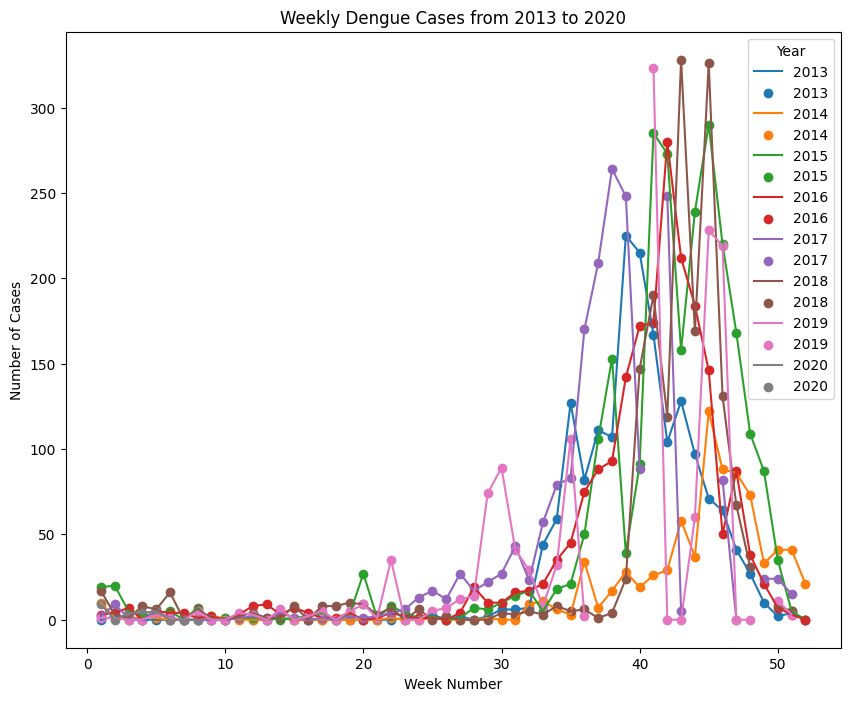

In [6]:
plt.figure(figsize=(10, 8))

for year in df.columns[1:]:
    plt.plot(df['Week/ Year'], df[year], label=year)
    plt.scatter(df['Week/ Year'], df[year], label=year)

#plt.plot(df['Week/ Year'],df['2013'])
#plt.plot(df['Week/ Year'],df['2018'])

plt.title('Weekly Dengue Cases from 2013 to 2020')
plt.xlabel('Week Number')
plt.ylabel('Number of Cases')
plt.legend(title='Year')

plt.show()


In [15]:

file_path = 'C:/Users\91797\Desktop\IMD_PUNE_PS-I_2024\Bihar\IMD_Temp\Maxtemp_MaxT_2013_2020.nc'
data = xr.open_dataset(file_path)

print(data)


<>:7: SyntaxWarning: invalid escape sequence '\9'
<>:7: SyntaxWarning: invalid escape sequence '\9'
C:\Users\91797\AppData\Local\Temp\ipykernel_3428\1877799993.py:7: SyntaxWarning: invalid escape sequence '\9'
  file_path = 'C:/Users\91797\Desktop\IMD_PUNE_PS-I_2024\Bihar\IMD_Temp\Maxtemp_MaxT_2013_2020.nc'


<xarray.Dataset> Size: 11MB
Dimensions:  (time: 2922, lon: 31, lat: 31)
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 2013-01-02 ... 2020-12-31
  * lon      (lon) float64 248B 67.5 68.5 69.5 70.5 71.5 ... 94.5 95.5 96.5 97.5
  * lat      (lat) float64 248B 7.5 8.5 9.5 10.5 11.5 ... 34.5 35.5 36.5 37.5
Data variables:
    tmax     (time, lat, lon) float32 11MB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Mon Aug 01 21:34:17 2022: cdo mergetime Maxtemp_MaxT_1510_1...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...


In [17]:
import xarray as xr

# Load the NetCDF file with decode_times=False
file_path = 'C:/Users\91797\Desktop\IMD_PUNE_PS-I_2024\Bihar\IMD_Temp\Maxtemp_MaxT_2013_2020.nc'
data = xr.open_dataset(file_path, decode_times=False)

# Inspect the data
print(data)


<xarray.Dataset> Size: 11MB
Dimensions:  (time: 2922, lon: 31, lat: 31)
Coordinates:
  * time     (time) float64 23kB 1.764e+07 1.764e+07 ... 1.771e+07 1.771e+07
  * lon      (lon) float64 248B 67.5 68.5 69.5 70.5 71.5 ... 94.5 95.5 96.5 97.5
  * lat      (lat) float64 248B 7.5 8.5 9.5 10.5 11.5 ... 34.5 35.5 36.5 37.5
Data variables:
    tmax     (time, lat, lon) float32 11MB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Mon Aug 01 21:34:17 2022: cdo mergetime Maxtemp_MaxT_1510_1...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...


<>:4: SyntaxWarning: invalid escape sequence '\9'
<>:4: SyntaxWarning: invalid escape sequence '\9'
C:\Users\91797\AppData\Local\Temp\ipykernel_3428\4278306171.py:4: SyntaxWarning: invalid escape sequence '\9'
  file_path = 'C:/Users\91797\Desktop\IMD_PUNE_PS-I_2024\Bihar\IMD_Temp\Maxtemp_MaxT_2013_2020.nc'


<xarray.Dataset> Size: 11MB
Dimensions:  (time: 2922, lon: 31, lat: 31)
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 2013-01-02 ... 2020-12-31
  * lon      (lon) float64 248B 67.5 68.5 69.5 70.5 71.5 ... 94.5 95.5 96.5 97.5
  * lat      (lat) float64 248B 7.5 8.5 9.5 10.5 11.5 ... 34.5 35.5 36.5 37.5
Data variables:
    tmin     (time, lat, lon) float32 11MB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Wed Aug 03 19:13:19 2022: cdo mergetime Mintemp_MinT_1951_1...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...


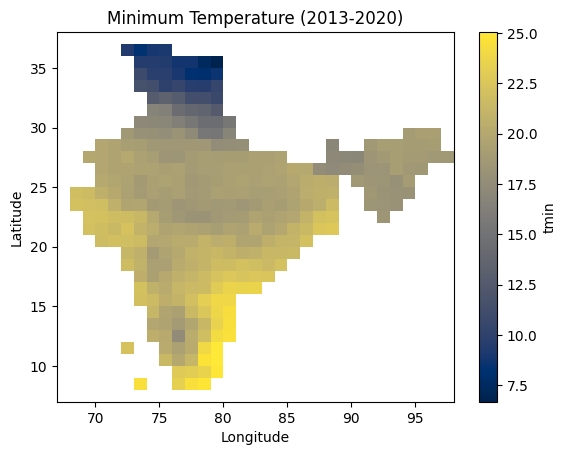

In [41]:
fp2='C:/Users/91797/Desktop/IMD_PUNE_PS-I_2024/Bihar/IMD_Temp/MINtemp_MinT_2013_2020.nc'
tempmin_ds = xr.open_dataset(fp2)
print(tempmin_ds)

tempmin = tempmin_ds['tmin']

tempmin_mean = tempmin.mean(dim='time')

plt.figure()
tempmin_mean.plot(cmap='cividis')
plt.title('Minimum Temperature (2013-2020)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<xarray.Dataset> Size: 11MB
Dimensions:  (time: 2922, lon: 31, lat: 31)
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 2013-01-02 ... 2020-12-31
  * lon      (lon) float64 248B 67.5 68.5 69.5 70.5 71.5 ... 94.5 95.5 96.5 97.5
  * lat      (lat) float64 248B 7.5 8.5 9.5 10.5 11.5 ... 34.5 35.5 36.5 37.5
Data variables:
    tmin     (time, lat, lon) float32 11MB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Wed Aug 03 19:13:19 2022: cdo mergetime Mintemp_MinT_1951_1...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...


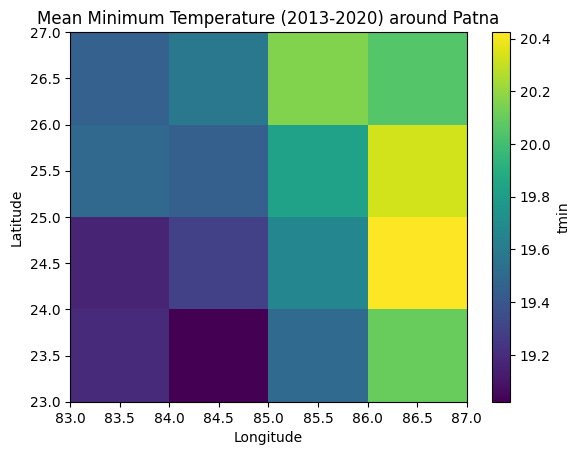

In [51]:
import xarray as xr
import matplotlib.pyplot as plt
fp2 = 'C:/Users/91797/Desktop/IMD_PUNE_PS-I_2024/Bihar/IMD_Temp/MINtemp_MinT_2013_2020.nc'

tempmin_ds = xr.open_dataset(fp2)

print(tempmin_ds)

tempmin = tempmin_ds['tmin']

tempmin_mean = tempmin.mean(dim='time')

lat_range = [23.0, 27.0]
lon_range = [83, 87]

tempmin_mean_subset = tempmin_mean.sel(lat=slice(*lat_range), lon=slice(*lon_range))

tempmin_mean_subset.plot()
plt.title('Mean Minimum Temperature (2013-2020) around Patna')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


<>:3: SyntaxWarning: invalid escape sequence '\9'
<>:3: SyntaxWarning: invalid escape sequence '\9'
C:\Users\91797\AppData\Local\Temp\ipykernel_27804\2395233309.py:3: SyntaxWarning: invalid escape sequence '\9'
  fp1 = 'C:/Users\91797\Desktop\IMD_PUNE_PS-I_2024\Bihar\IMD_Temp\Maxtemp_MaxT_2013_2020.nc'


<xarray.Dataset> Size: 11MB
Dimensions:  (time: 2922, lon: 31, lat: 31)
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 2013-01-02 ... 2020-12-31
  * lon      (lon) float64 248B 67.5 68.5 69.5 70.5 71.5 ... 94.5 95.5 96.5 97.5
  * lat      (lat) float64 248B 7.5 8.5 9.5 10.5 11.5 ... 34.5 35.5 36.5 37.5
Data variables:
    tmax     (time, lat, lon) float32 11MB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Mon Aug 01 21:34:17 2022: cdo mergetime Maxtemp_MaxT_1510_1...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...


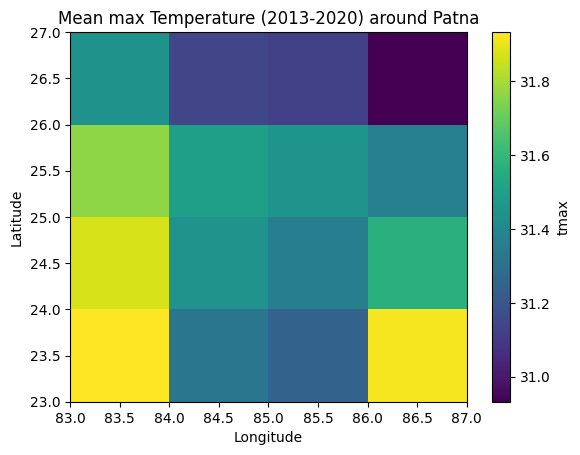

In [15]:
import xarray as xr
import matplotlib.pyplot as plt
fp1 = 'C:/Users\91797\Desktop\IMD_PUNE_PS-I_2024\Bihar\IMD_Temp\Maxtemp_MaxT_2013_2020.nc'

tempmax_ds = xr.open_dataset(fp1)

print(tempmax_ds)

tempmax = tempmax_ds['tmax']

tempmax_mean = tempmax.mean(dim='time')

lat_range = [23.0, 27.0]
lon_range = [83, 87]

tempmax_mean_subset = tempmax_mean.sel(lat=slice(*lat_range), lon=slice(*lon_range))

tempmax_mean_subset.plot()
plt.title('Mean max Temperature (2013-2020) around Patna')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [55]:
fp_rain='C:/Users/91797/Desktop/IMD_PUNE_PS-I_2024/Bihar/IMD_Rainfall_0.25/ind2016_rfp25.nc'
data_rain=xr.open_dataset(fp_rain)
print(data_rain)

<xarray.Dataset> Size: 26MB
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 366)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 1kB 66.5 66.75 67.0 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 1kB 6.5 6.75 7.0 7.25 ... 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 3kB 2016-01-01 2016-01-02 ... 2016-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float32 25MB ...
Attributes:
    history:      FERRET V6.9   13-Jan-21
    Conventions:  CF-1.0


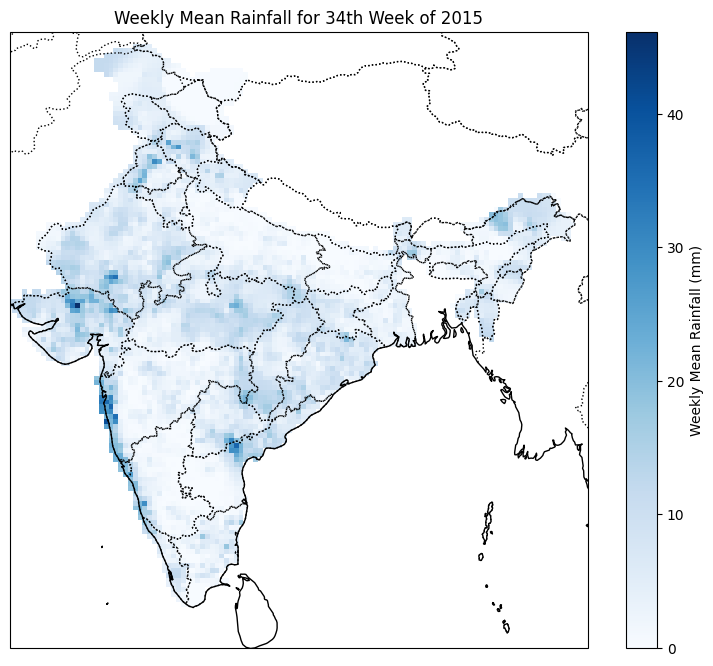

In [7]:


file_path = 'C:/Users/91797/Desktop/IMD_PUNE_PS-I_2024/Bihar/IMD_Rainfall_0.25/ind2016_rfp25.nc'
dataset = xr.open_dataset(file_path)


rainfall = dataset['RAINFALL']
time = dataset['TIME']

time_converted = pd.date_range(start='2015-01-01', periods=len(time), freq='D')

rainfall_da = xr.DataArray(rainfall, coords=[time_converted, dataset['LATITUDE'], dataset['LONGITUDE']], dims=['time', 'lat', 'lon'])


weekly_rainfall = rainfall_da.resample(time='W-SUN').mean()

example_week = weekly_rainfall.isel(time=34)

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

ax.set_extent([68, 98, 6, 38], crs=ccrs.PlateCarree())

rainfall_plot = ax.pcolormesh(dataset['LONGITUDE'], dataset['LATITUDE'], example_week, cmap='Blues', transform=ccrs.PlateCarree())

plt.colorbar(rainfall_plot, ax=ax, orientation='vertical', label='Weekly Mean Rainfall (mm)')
plt.title('Weekly Mean Rainfall for 34th Week of 2015')
plt.show()


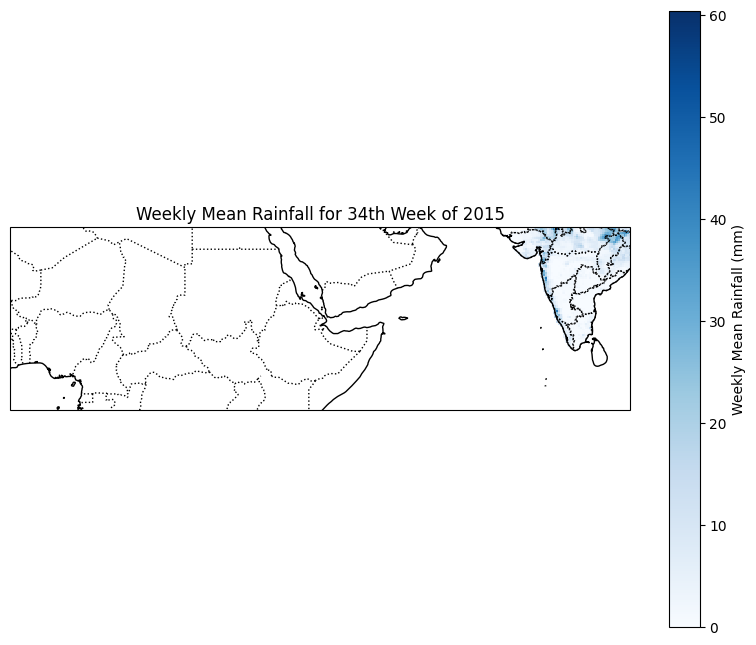

In [20]:

file_path = 'C:/Users/91797/Desktop/IMD_PUNE_PS-I_2024/Bihar/IMD_Rainfall_0.25/ind2016_rfp25.nc'
dataset = xr.open_dataset(file_path)

rainfall = dataset['RAINFALL']
time = dataset['TIME']

time_converted = pd.date_range(start='2015-01-01', periods=len(time), freq='D')

rainfall_da = xr.DataArray(rainfall, coords=[time_converted, dataset['LATITUDE'], dataset['LONGITUDE']], dims=['time', 'lat', 'lon'])


weekly_rainfall = rainfall_da.resample(time='W-SUN').mean()


example_week = weekly_rainfall.isel(time=32)


plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

ax.set_extent([0,85,,25], crs=ccrs.PlateCarree())

rainfall_plot = ax.pcolormesh(dataset['LONGITUDE'], dataset['LATITUDE'], example_week, cmap='Blues', transform=ccrs.PlateCarree())

plt.colorbar(rainfall_plot, ax=ax, orientation='vertical', label='Weekly Mean Rainfall (mm)')
plt.title('Weekly Mean Rainfall for 34th Week of 2015')
plt.show()

<xarray.Dataset> Size: 11MB
Dimensions:  (time: 2922, lon: 31, lat: 31)
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 2013-01-02 ... 2020-12-31
  * lon      (lon) float64 248B 67.5 68.5 69.5 70.5 71.5 ... 94.5 95.5 96.5 97.5
  * lat      (lat) float64 248B 7.5 8.5 9.5 10.5 11.5 ... 34.5 35.5 36.5 37.5
Data variables:
    tmin     (time, lat, lon) float32 11MB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Wed Aug 03 19:13:19 2022: cdo mergetime Mintemp_MinT_1951_1...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...


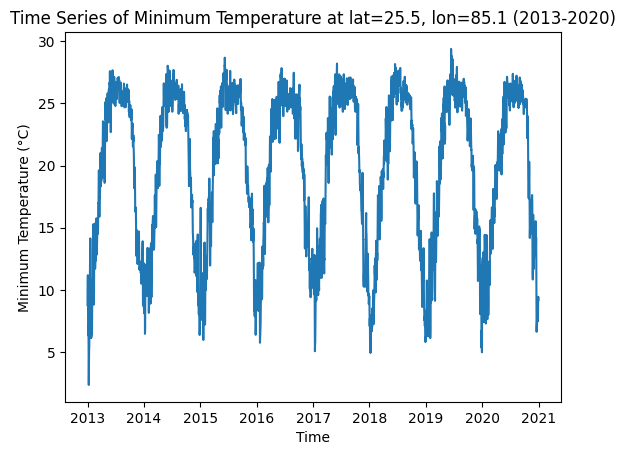

In [16]:
import xarray as xr
import matplotlib.pyplot as plt

fp2 = 'C:/Users/91797/Desktop/IMD_PUNE_PS-I_2024/Bihar/IMD_Temp/MINtemp_MinT_2013_2020.nc'


tempmin_ds = xr.open_dataset(fp2)


print(tempmin_ds)

tempmin = tempmin_ds['tmin']

lat_point = 25.5
lon_point = 85.1
tempmin_point = tempmin.sel(lat=lat_point, lon=lon_point, method='nearest')

plt.figure()
tempmin_point.plot()
plt.title('Time Series of Minimum Temperature at lat=25.5, lon=85.1 (2013-2020)')
plt.xlabel('Time')
plt.ylabel('Minimum Temperature (°C)')
plt.show()


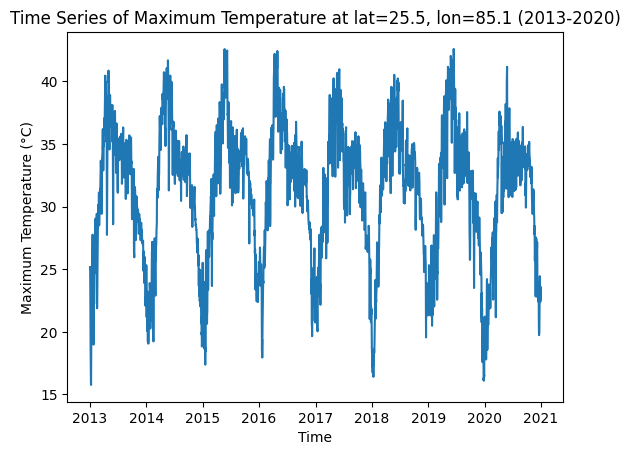

In [18]:
import xarray as xr
import matplotlib.pyplot as plt

fp1 = 'C:/Users/91797/Desktop/IMD_PUNE_PS-I_2024/Bihar/IMD_Temp/Maxtemp_MaxT_2013_2020.nc'

tempmax_ds = xr.open_dataset(fp1)

tempmax = tempmax_ds['tmax']

lat_point = 25.5
lon_point = 85.1
tempmax_point = tempmax.sel(lat=lat_point, lon=lon_point, method='nearest')

plt.figure()
tempmax_point.plot()
plt.title('Time Series of Maximum Temperature at lat=25.5, lon=85.1 (2013-2020)')
plt.xlabel('Time')
plt.ylabel('Maximum Temperature (°C)')
plt.show()


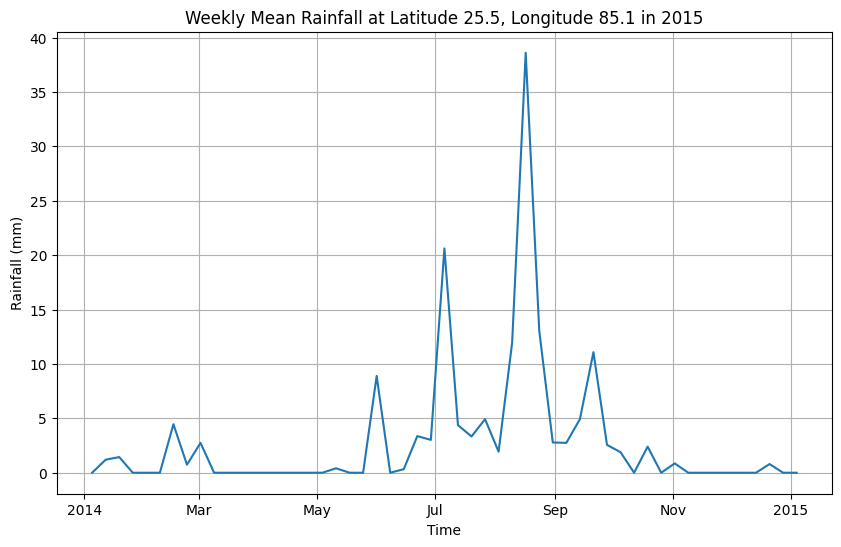

In [26]:
file_path = 'C:/Users/91797/Desktop/IMD_PUNE_PS-I_2024/Bihar/IMD_Rainfall_0.25/ind2014_rfp25.nc'
dataset = xr.open_dataset(file_path)


rainfall = dataset['RAINFALL']

rainfall_weekly = rainfall.resample(TIME='W').mean()

lat = 25.5
lon = 85.1
rainfall_time_series = rainfall_weekly.sel(LATITUDE=lat, LONGITUDE=lon, method='nearest')

plt.figure(figsize=(10, 6))
rainfall_time_series.plot()
plt.title(f'Weekly Mean Rainfall at Latitude {lat}, Longitude {lon} in 2015')
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()


In [5]:
import pandas as pd

# Load the Excel file
file_path = 'C:/Users/91797/Desktop/IMD_PUNE_PS-I_2024/Bihar/6_Dengue- 26_05_23/patna.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the data to understand its structure
data.head()


,Week/ Year,2013,2014,2015,2016,2017,2018,2019,2020
0,1,0,10,19,3,2.0,17.0,1.0,9.0
1,2,2,1,20,4,9.0,3.0,1.0,0.0
2,3,0,0,5,7,1.0,1.0,0.0,4.0
3,4,0,2,2,0,0.0,8.0,0.0,4.0
4,5,0,1,4,5,5.0,6.0,3.0,5.0


In [7]:

# Reshape the data
data_melted = pd.melt(data, id_vars=['Week/ Year'], var_name='Year', value_name='Value')
data_melted['Year'] = data_melted['Year'].astype(int)
data_melted['Week/ Year'] = data_melted['Week/ Year'].astype(int)

# Create a Date column that represents the starting date of each week
data_melted['Date'] = pd.to_datetime(data_melted['Year'].astype(str) + data_melted['Week/ Year'].astype(str).add('-1'), format='%Y%W-%w')

# Sort the data by Date
data_melted = data_melted.sort_values('Date').reset_index(drop=True)

# Create a continuous weekly index
data_melted['Week_Index'] = range(len(data_melted))

data_melted.head(201)



,Week/ Year,Year,Value,Date,Week_Index
0,1,2013,0.0,2013-01-07,0
1,2,2013,2.0,2013-01-14,1
2,3,2013,0.0,2013-01-21,2
3,4,2013,0.0,2013-01-28,3
4,5,2013,0.0,2013-02-04,4
...,...,...,...,...,...
196,41,2016,174.0,2016-10-10,196
197,42,2016,280.0,2016-10-17,197
198,43,2016,212.0,2016-10-24,198
199,44,2016,184.0,2016-10-31,199


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score



data_melted['Prev_Week_1'] = data_melted['Value'].shift(1)
data_melted['Prev_Week_2'] = data_melted['Value'].shift(2)

data_melted['Next_Week'] = data_melted['Value'].shift(-1)

data_prepared = data_melted.dropna().reset_index(drop=True)

data_prepared.head()


data_prepared['Week_Number'] = data_melted['Week/ Year']

X = data_prepared[['Week_Number', 'Prev_Week_1', 'Prev_Week_2']]
y = data_prepared['Next_Week']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

def predict_next_week(week_number, prev_week_1, prev_week_2):
    input_data = pd.DataFrame([[week_number, prev_week_1, prev_week_2]], columns=['Week_Number', 'Prev_Week_1', 'Prev_Week_2'])
    prediction = model.predict(input_data)
    return prediction[0]

# Example of manual input
week_number = 200
prev_week_1 = 184
prev_week_2 = 212

predicted_value = predict_next_week(week_number, prev_week_1, prev_week_2)
print(f"Predicted value for week {week_number+1}: {predicted_value}")



Predicted value for week 201: 187.85233354765316


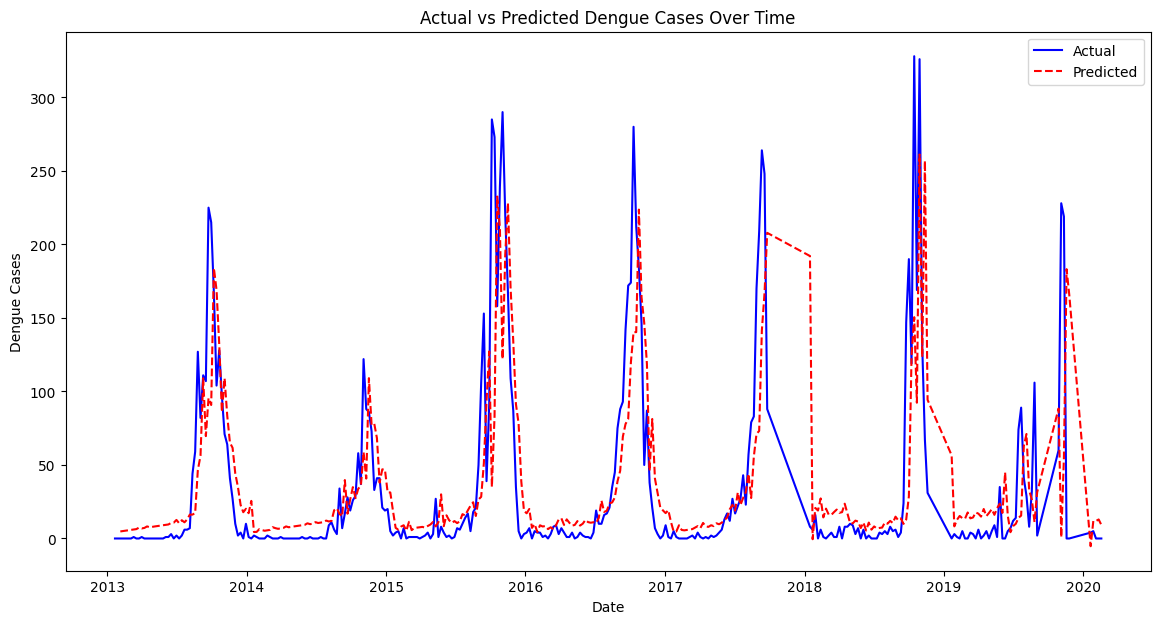

In [9]:

predictions = []

for i in range(len(data_prepared)):
    if i < 2:  
        predictions.append(None)
    else:
        week_number = data_prepared.loc[i, 'Week_Number']
        prev_week_1 = data_prepared.loc[i-1, 'Value']
        prev_week_2 = data_prepared.loc[i-2, 'Value']
        prediction = predict_next_week(week_number, prev_week_1, prev_week_2)
        predictions.append(prediction)

data_prepared['Predicted_Next_Week'] = predictions


plt.figure(figsize=(14, 7))
plt.plot(data_prepared['Date'], data_prepared['Next_Week'], label='Actual', color='blue')
plt.plot(data_prepared['Date'], data_prepared['Predicted_Next_Week'], label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Dengue Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Dengue Cases')
plt.legend()
plt.show()


In [10]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 42.319922478097254


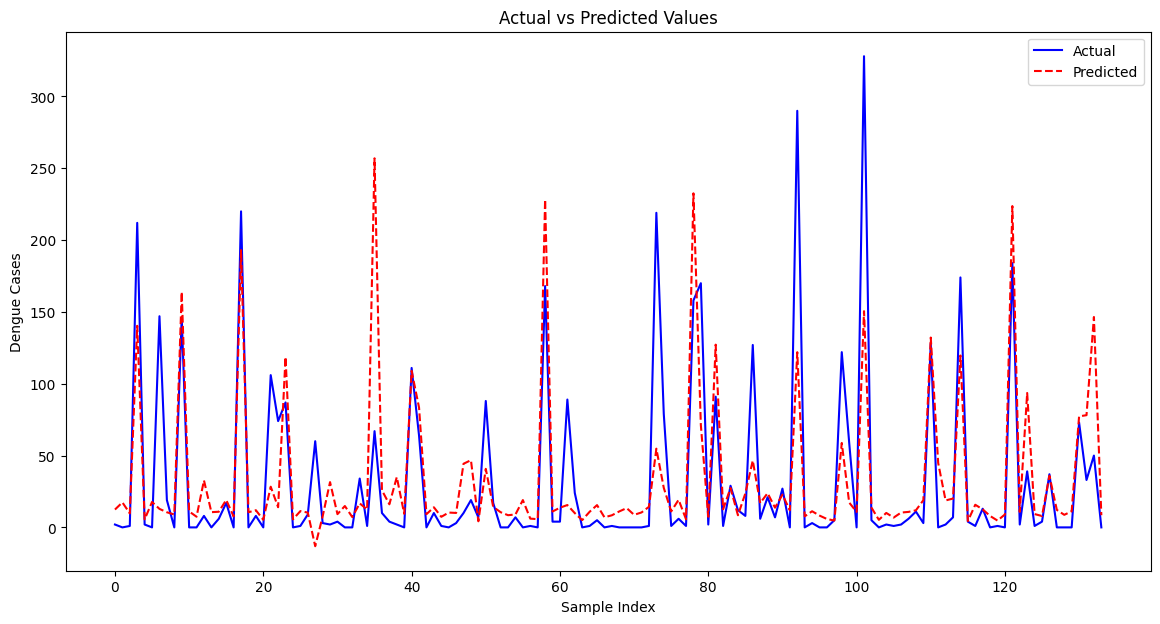

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Dengue Cases')
plt.legend()
plt.show()


RMSE for test set: 58.47926753328309


C:\Users\91797\AppData\Local\Temp\ipykernel_12092\196523743.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Next_Week'] = model.predict(X_test)


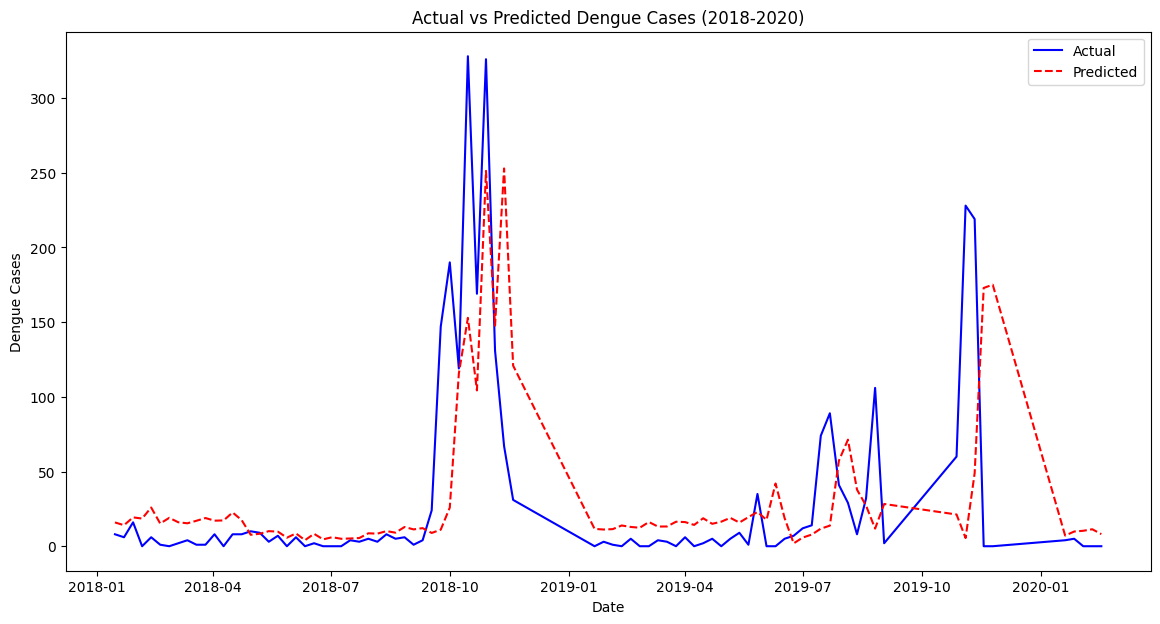

In [12]:


file_path = 'C:/Users/91797/Desktop/IMD_PUNE_PS-I_2024/Bihar/6_Dengue- 26_05_23/patna.xlsx'
data = pd.read_excel(file_path)

data_melted = pd.melt(data, id_vars=['Week/ Year'], var_name='Year', value_name='Value')
data_melted['Year'] = data_melted['Year'].astype(int)
data_melted['Week/ Year'] = data_melted['Week/ Year'].astype(int)

data_melted['Date'] = pd.to_datetime(data_melted['Year'].astype(str) + data_melted['Week/ Year'].astype(str).add('-1'), format='%Y%W-%w')

data_melted = data_melted.sort_values('Date').reset_index(drop=True)

data_melted['Week_Index'] = range(len(data_melted))

data_melted['Prev_Week_1'] = data_melted['Value'].shift(1)
data_melted['Prev_Week_2'] = data_melted['Value'].shift(2)
data_melted['Next_Week'] = data_melted['Value'].shift(-1)

data_prepared = data_melted.dropna().reset_index(drop=True)
data_prepared['Week_Number'] = data_melted['Week/ Year']

train_data = data_prepared[data_prepared['Year'] <= 2017]
test_data = data_prepared[data_prepared['Year'] >= 2018]

X_train = train_data[['Week_Number', 'Prev_Week_1', 'Prev_Week_2']]
y_train = train_data['Next_Week']
X_test = test_data[['Week_Number', 'Prev_Week_1', 'Prev_Week_2']]
y_test = test_data['Next_Week']

model = LinearRegression()
model.fit(X_train, y_train)

test_data['Predicted_Next_Week'] = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, test_data['Predicted_Next_Week']))
print(f"RMSE for test set: {rmse}")

plt.figure(figsize=(14, 7))
plt.plot(test_data['Date'], test_data['Next_Week'], label='Actual', color='blue')
plt.plot(test_data['Date'], test_data['Predicted_Next_Week'], label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Dengue Cases (2018-2020)')
plt.xlabel('Date')
plt.ylabel('Dengue Cases')
plt.legend()
plt.show()

                                                                                                       

In [3]:

file_path = 'C:/Users/91797/Desktop/IMD_PUNE_PS-I_2024/Bihar/6_Dengue- 26_05_23/patna.xlsx'
dengue_data = pd.read_excel(file_path)

dengue_melted = pd.melt(dengue_data, id_vars=['Week/ Year'], var_name='Year', value_name='Dengue_Cases')
dengue_melted['Year'] = dengue_melted['Year'].astype(int)
dengue_melted['Week/ Year'] = dengue_melted['Week/ Year'].astype(int)

dengue_melted['Date'] = pd.to_datetime(dengue_melted['Year'].astype(str) + dengue_melted['Week/ Year'].astype(str).add('-1'), format='%Y%W-%w')

dengue_melted = dengue_melted.sort_values('Date').reset_index(drop=True)
dengue_melted['Week_Index'] = range(len(dengue_melted))


In [4]:
rainfall_file_path = 'C:/Users\91797\Desktop\IMD_PUNE_PS-I_2024\Bihar\IMD_Rainfall_0.25\weekly_rainfall_data.nc'
rainfall_data = xr.open_dataset(rainfall_file_path, engine='netcdf4')

rainfall_df = rainfall_data.to_dataframe().reset_index()

rainfall_df['Week'] = rainfall_df['time'].dt.isocalendar().week
rainfall_df['Year'] = rainfall_df['time'].dt.year

rainfall_df = rainfall_df.groupby(['Year', 'Week']).mean().reset_index()

temperature_file_path = 'C:/Users\91797\Desktop\IMD_PUNE_PS-I_2024\Bihar\IMD_Temp\sliced_data_final.nc'
temperature_data = xr.open_dataset(temperature_file_path, engine='netcdf4')

temperature_df = temperature_data.to_dataframe().reset_index()

temperature_df['Week'] = temperature_df['time'].dt.isocalendar().week
temperature_df['Year'] = temperature_df['time'].dt.year

temperature_df = temperature_df.groupby(['Year', 'Week']).mean().reset_index()


<>:1: SyntaxWarning: invalid escape sequence '\9'
<>:11: SyntaxWarning: invalid escape sequence '\9'
<>:1: SyntaxWarning: invalid escape sequence '\9'
<>:11: SyntaxWarning: invalid escape sequence '\9'
C:\Users\91797\AppData\Local\Temp\ipykernel_2516\1184097773.py:1: SyntaxWarning: invalid escape sequence '\9'
  rainfall_file_path = 'C:/Users\91797\Desktop\IMD_PUNE_PS-I_2024\Bihar\IMD_Rainfall_0.25\weekly_rainfall_data.nc'
C:\Users\91797\AppData\Local\Temp\ipykernel_2516\1184097773.py:11: SyntaxWarning: invalid escape sequence '\9'
  temperature_file_path = 'C:/Users\91797\Desktop\IMD_PUNE_PS-I_2024\Bihar\IMD_Temp\sliced_data_final.nc'


In [5]:
data_merged = pd.merge(dengue_melted, rainfall_df, left_on=['Year', 'Week/ Year'], right_on=['Year', 'Week'])

data_merged = pd.merge(data_merged, temperature_df, left_on=['Year', 'Week/ Year'], right_on=['Year', 'Week'], suffixes=('_rainfall', '_temperature'))

data_merged['Prev_Week_1'] = data_merged['Dengue_Cases'].shift(1)
data_merged['Prev_Week_2'] = data_merged['Dengue_Cases'].shift(2)
data_merged['Next_Week'] = data_merged['Dengue_Cases'].shift(-1)

data_prepared = data_merged.dropna().reset_index(drop=True)
data_prepared['Week_Number'] = data_prepared['Week/ Year']


RMSE for test set: 58.063475191178036
Correlation between actual and predicted values: 0.5425929888502714


C:\Users\91797\AppData\Local\Temp\ipykernel_2516\1782322570.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Next_Week'] = model.predict(X_test)


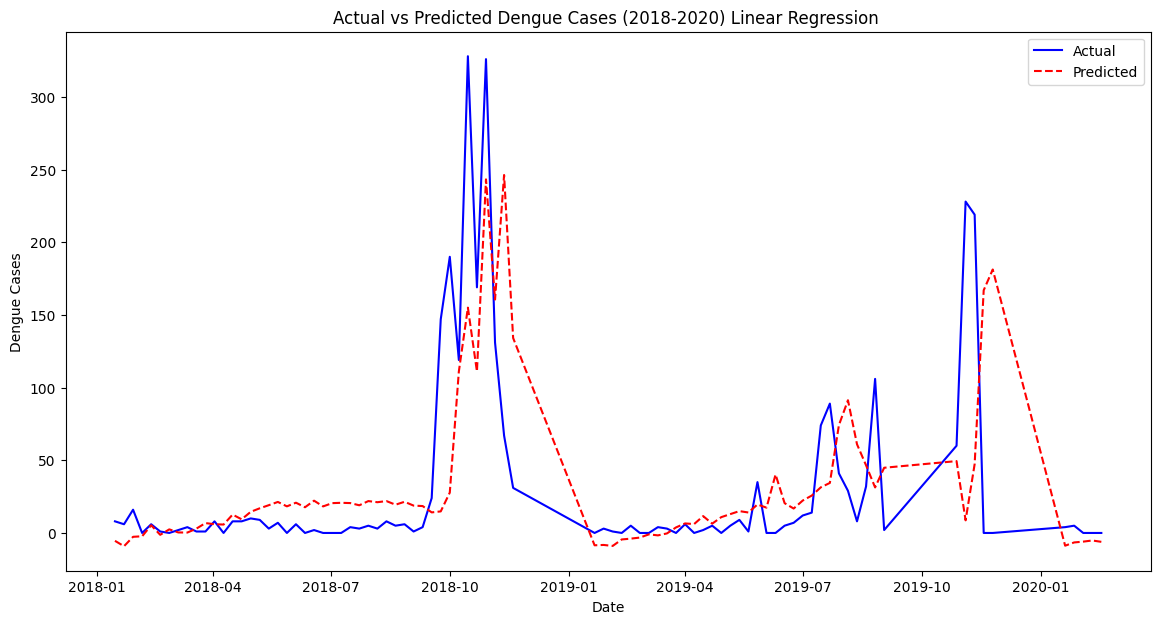

In [6]:
train_data = data_prepared[data_prepared['Year'] <= 2017]
test_data = data_prepared[data_prepared['Year'] >= 2018]

X_train = train_data[['Week_Number', 'Prev_Week_1', 'Prev_Week_2', 'Rainfall', 'T']]
y_train = train_data['Next_Week']
X_test = test_data[['Week_Number', 'Prev_Week_1', 'Prev_Week_2', 'Rainfall', 'T']]
y_test = test_data['Next_Week']

model = LinearRegression()
model.fit(X_train, y_train)

test_data['Predicted_Next_Week'] = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, test_data['Predicted_Next_Week']))
print(f"RMSE for test set: {rmse}")

correlation, _ = pearsonr(y_test, test_data['Predicted_Next_Week'])
print(f"Correlation between actual and predicted values: {correlation}")


plt.figure(figsize=(14, 7))
plt.plot(test_data['Date'], test_data['Next_Week'], label='Actual', color='blue')
plt.plot(test_data['Date'], test_data['Predicted_Next_Week'], label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Dengue Cases (2018-2020) Linear Regression ')
plt.xlabel('Date')
plt.ylabel('Dengue Cases')
plt.legend()
plt.show()


RMSE for test set: 53.66277952443403
Correlation between actual and predicted values: 0.6075560188481086


C:\Users\91797\AppData\Local\Temp\ipykernel_2516\1071781277.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Next_Week'] = regressor.predict(test_data_som)


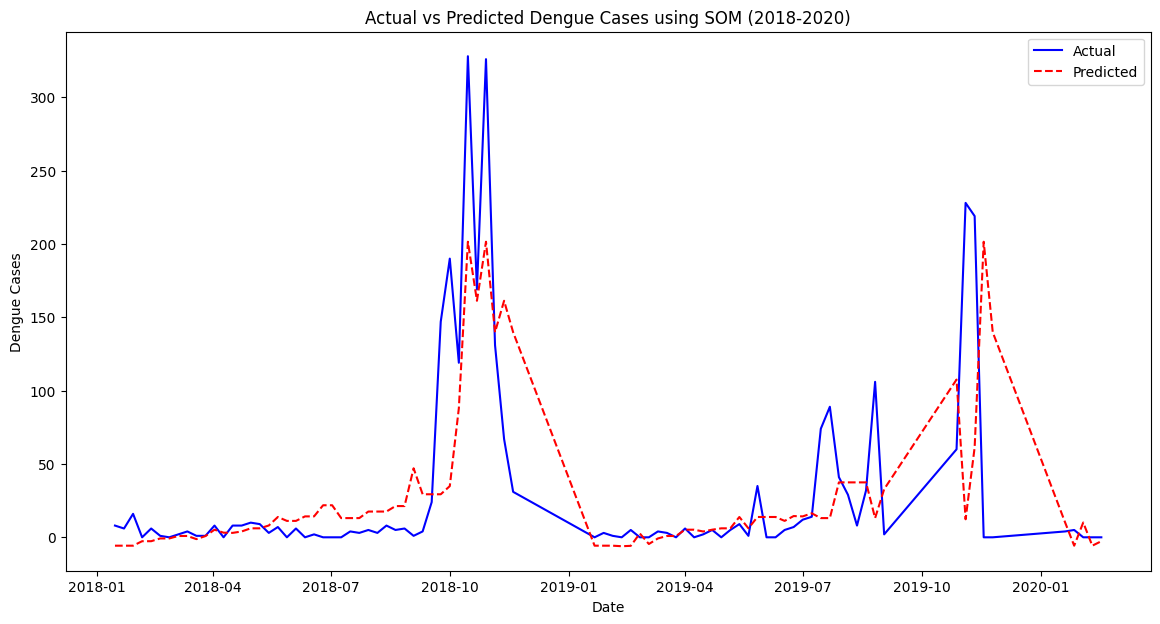

Predicted value for next week: 139.82198241053604


In [12]:

file_path = 'C:/Users/91797/Desktop/IMD_PUNE_PS-I_2024/Bihar/6_Dengue- 26_05_23/patna.xlsx'
dengue_data = pd.read_excel(file_path)

dengue_melted = pd.melt(dengue_data, id_vars=['Week/ Year'], var_name='Year', value_name='Dengue_Cases')
dengue_melted['Year'] = dengue_melted['Year'].astype(int)
dengue_melted['Week/ Year'] = dengue_melted['Week/ Year'].astype(int)

dengue_melted['Date'] = pd.to_datetime(dengue_melted['Year'].astype(str) + dengue_melted['Week/ Year'].astype(str).add('-1'), format='%Y%W-%w')
dengue_melted = dengue_melted.sort_values('Date').reset_index(drop=True)
dengue_melted['Week_Index'] = range(len(dengue_melted))

# Load the rainfall data
rainfall_file_path = 'C:/Users/91797/Desktop/IMD_PUNE_PS-I_2024/Bihar/IMD_Rainfall_0.25/weekly_rainfall_data.nc'
rainfall_data = xr.open_dataset(rainfall_file_path, engine='netcdf4')

rainfall_df = rainfall_data.to_dataframe().reset_index()
rainfall_df['Week'] = rainfall_df['time'].dt.isocalendar().week
rainfall_df['Year'] = rainfall_df['time'].dt.year
rainfall_df = rainfall_df.groupby(['Year', 'Week']).mean().reset_index()

# Load the temperature data
temperature_file_path = 'C:/Users/91797/Desktop/IMD_PUNE_PS-I_2024/Bihar/IMD_Temp/sliced_data_final.nc'
temperature_data = xr.open_dataset(temperature_file_path, engine='netcdf4')

temperature_df = temperature_data.to_dataframe().reset_index()
temperature_df['Week'] = temperature_df['time'].dt.isocalendar().week
temperature_df['Year'] = temperature_df['time'].dt.year
temperature_df = temperature_df.groupby(['Year', 'Week']).mean().reset_index()

# Merge the data
data_merged = pd.merge(dengue_melted, rainfall_df, left_on=['Year', 'Week/ Year'], right_on=['Year', 'Week'])
data_merged = pd.merge(data_merged, temperature_df, left_on=['Year', 'Week/ Year'], right_on=['Year', 'Week'], suffixes=('_rainfall', '_temperature'))

data_merged['Prev_Week_1'] = data_merged['Dengue_Cases'].shift(1)
data_merged['Prev_Week_2'] = data_merged['Dengue_Cases'].shift(2)
data_merged['Next_Week'] = data_merged['Dengue_Cases'].shift(-1)

data_prepared = data_merged.dropna().reset_index(drop=True)
data_prepared['Week_Number'] = data_prepared['Week/ Year']
train_data = data_prepared[data_prepared['Year'] <= 2017]
test_data = data_prepared[data_prepared['Year'] >= 2018]


scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data[['Week_Number', 'Prev_Week_1', 'Prev_Week_2', 'Rainfall', 'T']])
test_data_scaled = scaler.transform(test_data[['Week_Number', 'Prev_Week_1', 'Prev_Week_2', 'Rainfall', 'T']])

som = MiniSom(x=10, y=10, input_len=5, sigma=1.0, learning_rate=0.5)
som.random_weights_init(train_data_scaled)
som.train_random(train_data_scaled, 100)

som_weights = som.get_weights().reshape(-1, 5)

train_data_som = np.array([som.winner(x) for x in train_data_scaled])
train_data_som = np.array([som.get_weights()[i, j] for i, j in train_data_som]).reshape(-1, 5)

test_data_som = np.array([som.winner(x) for x in test_data_scaled])
test_data_som = np.array([som.get_weights()[i, j] for i, j in test_data_som]).reshape(-1, 5)

regressor = LinearRegression()
regressor.fit(train_data_som, train_data['Next_Week'].values)

test_data['Predicted_Next_Week'] = regressor.predict(test_data_som)

rmse = np.sqrt(mean_squared_error(test_data['Next_Week'], test_data['Predicted_Next_Week']))
print(f"RMSE for test set: {rmse}")

correlation = np.corrcoef(test_data['Next_Week'], test_data['Predicted_Next_Week'])[0, 1]
print(f"Correlation between actual and predicted values: {correlation}")

plt.figure(figsize=(14, 7))
plt.plot(test_data['Date'], test_data['Next_Week'], label='Actual', color='blue')
plt.plot(test_data['Date'], test_data['Predicted_Next_Week'], label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Dengue Cases using SOM (2018-2020)')
plt.xlabel('Date')
plt.ylabel('Dengue Cases')
plt.legend()
plt.show()

# Function to predict next week dengue cases
def predict_next_week(week_number, prev_week_1, prev_week_2, rainfall, temperature):
    input_data = pd.DataFrame([[week_number, prev_week_1, prev_week_2, rainfall, temperature]], 
                              columns=['Week_Number', 'Prev_Week_1', 'Prev_Week_2', 'Rainfall', 'T'])
    input_data_scaled = scaler.transform(input_data)
    winner_node = som.winner(input_data_scaled[0])
    som_weight = som.get_weights()[winner_node]
    prediction = regressor.predict(som_weight.reshape(1, -1))
    return prediction[0]

# Example usage
week_number = 200
prev_week_1 = 184
prev_week_2 = 212
rainfall = 15.2
temperature = 28.5

predicted_value = predict_next_week(week_number, prev_week_1, prev_week_2, rainfall, temperature)
print(f"Predicted value for next week: {predicted_value}")
